In [ ]:
import numpy as np 
import pandas as pd 
from scipy import stats    
import matplotlib.pyplot as plt 
#import seaborn as sns     # 시각화
#from sklearn import preprocessing

In [ ]:
# 구글드라이브에 파일 업로드하면 colab 상에서 이용가능
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# TDM(Term-Document Matrix): row-vocab / column-file name
TDM = pd.read_csv('/content/drive/MyDrive/TDM.txt', sep = '\t', index_col = 0)

In [ ]:
# DataFrame 구조 확인하기 1
TDM.head()  # 5개 default
# TDM.head(15)
# TDM.tail()
# TDM

,01.txt,02.txt,03.txt,04.txt
14th,0,0,0,1
15,0,0,0,1
1656,0,0,0,1
1761,0,0,0,1
17th,0,0,0,1
...,...,...,...,...
years,2,0,0,0
york,0,0,1,0
you,4,0,0,0
young,0,1,0,0


In [ ]:
# DataFrame 구조 확인하기 2
print(TDM.shape)
TDM.info()
TDM.describe() 

(244, 4)
<class 'pandas.core.frame.DataFrame'>
Index: 244 entries, 14th to your
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   01.txt  244 non-null    int64
 1   02.txt  244 non-null    int64
 2   03.txt  244 non-null    int64
 3   04.txt  244 non-null    int64
dtypes: int64(4)
memory usage: 9.5+ KB


,01.txt,02.txt,03.txt,04.txt
count,244.000000,244.000000,244.000000,244.000000
mean,0.348361,0.356557,0.516393,0.491803
std,0.778807,0.647818,1.152800,0.833910
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,11.000000,5.000000


In [ ]:
# 결측치 여부 확인
TDM.isnull().sum()
# 결측치 채우기
# 후술

01.txt    0
02.txt    0
03.txt    0
04.txt    0
dtype: int64

In [ ]:
# df indexing: column명 가능// row명, 숫자 indexing 불가능
# df slicing: row명, 숫자 가능// column명 불가능
# df Fancy indexing: coulumn명 가능 / row명, 숫자 불가능 , dataFrame으로 출력, slicing 불가능
# [row, column] indexing 불가능
# loc['row명'], loc['row명', 'column명'] slicing, Fancy indexing 가능
# iloc[column index], iloc[row index, column index] slicing, Fancy indexing 가능
# iloc[[row index]]

In [ ]:
df = pd.DataFrame(np.arange(16).reshape(4,4), index = list('abcd'), columns = list('ABCD'))
df

df.iloc[[0]]
# df.loc['a']
# df[0:1]
# df['a']

,A,B,C,D
a,0,1,2,3


In [ ]:
TDM.iloc[[0,1,2,-3,-2,-1]]

,01.txt,02.txt,03.txt,04.txt
14th,0,0,0,1
15,0,0,0,1
1656,0,0,0,1
you,4,0,0,0
young,0,1,0,0
your,5,0,0,0


In [ ]:
# Series 정렬
a = TDM['01.txt']        # TDM 첫번째 열 type:  Series 
a.sort_index().head()                      # index 오름차순
a.sort_index(ascending = False).head()     # index 내림차순
a.sort_values().head()                     # value 오름차순
a.sort_values(ascending = False).head()    # value 내림차순

your    5
you     4
the     4
to      4
have    3
Name: 01.txt, dtype: int64

In [ ]:
# DataFrame 정렬
TDM.sort_index(axis=0, ascending = True).head()      # 행 index 오름차순 default
TDM.sort_index(axis=1, ascending = False).head()    # 열 index 내림차순
TDM.sort_values(by = '03.txt', ascending = False).head()   # 03.txt 값을 기준으로 내림차순
TDM.sort_values(by = ['03.txt','02.txt'], ascending = [False, True]).head(10)  # 1차기준: 03.txt내림차순, 2차기준: 02.txt 오름차순

,01.txt,02.txt,03.txt,04.txt
to,4,5,11,5
the,4,3,7,4
is,1,3,5,0
it,1,0,4,1
of,2,1,4,1
they,0,1,4,0
painting,0,0,3,0
should,0,0,3,0
work,0,0,3,0
in,3,1,3,5


In [ ]:
# 연산
b = TDM.loc[['a', 'an','the', 'of', 'to']]
b

,01.txt,02.txt,03.txt,04.txt
a,1,2,2,3
an,0,2,1,0
the,4,3,7,4
of,2,1,4,1
to,4,5,11,5


In [ ]:
c = b.iloc[::-2,::-2]
c

,04.txt,02.txt
to,5,5
the,4,3
a,3,2


In [ ]:
b + c
b.add(c, fill_value = 0)  # row명 오름차순, column명 오름차순, float
# b.sub(c, fill_value = 0)
# b.mul(c, fill_value = 0)
# b.div(c, axis = 1, fill_value = 0)    # c -> Series일 때 Series의 index와 match되어 연산됨

,01.txt,02.txt,03.txt,04.txt
a,0.0,4.0,0.0,9.0
an,0.0,0.0,0.0,0.0
of,0.0,0.0,0.0,0.0
the,0.0,9.0,0.0,16.0
to,0.0,25.0,0.0,25.0


In [ ]:
# apply(function, axis=0): axis=0(열) 연산이 default
# applymap(function): 전체 값에 적용되는 연산

In [ ]:
#b
b.apply(sum)            # 각 열의 value들의 합
b.apply(sum, axis=1)    # 각 행의 value들의 합
b.apply(lambda x: max(x) - min(x))    # 각 열의 최댓값-최솟값 

01.txt    11
02.txt    13
03.txt    25
04.txt    13
dtype: int64

In [ ]:
b.applymap(float)

,01.txt,02.txt,03.txt,04.txt
a,1.0,2.0,2.0,3.0
an,0.0,2.0,1.0,0.0
the,4.0,3.0,7.0,4.0
of,2.0,1.0,4.0,1.0
to,4.0,5.0,11.0,5.0


In [ ]:
# 기술통계: 수치 척도
# 기본적으로 column기준(axis=0)으로 연산되며, 출력결과는 Series(1차원) 
# method(axis = , skipna = True): nan값이 있을 때 제외하고 연산함
TDM.sum()           # TDM.apply(sum)
TDM.sum(axis = 1)   # TDM.apply(sum, axis = 1)
TDM.mean()
TDM.median()
TDM.var()
TDM.std(axis=1)

14th     0.5
15       0.5
1656     0.5
1761     0.5
17th     0.5
        ... 
years    1.0
york     0.5
you      2.0
young    0.5
your     2.5
Length: 244, dtype: float64

In [ ]:
TDM.describe()      # 기술통계량, dataFrame으로 출력
TDM.describe().loc['75%'].sub(TDM.describe().loc['25%'])   # IQR(사분위수)

,01.txt,02.txt,03.txt,04.txt
count,244.000000,244.000000,244.000000,244.000000
mean,0.348361,0.356557,0.516393,0.491803
std,0.778807,0.647818,1.152800,0.833910
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,1.000000,1.000000
max,5.000000,5.000000,11.000000,5.000000


In [ ]:
# idxmax(), idxmin(): 최대/최솟값의 index 추출, axis=0(열 기준) 연산 default, 출력결과 Series
# 최댓값/최솟값이 중복일 때는 먼저 나온 index가 출력됨(행 기준 위쪽, 열 기준 왼쪽) #
TDM.idxmax()   
TDM.idxmax(axis=1)  
TDM.idxmin()
TDM.idxmin(axis=1)

01.txt    your
02.txt      to
03.txt      to
04.txt     and
dtype: object

In [ ]:
# 기술통계: 명목척도(질적 data)

In [ ]:
# 결측치 여부 확인
# 결측치 채우기

In [ ]:
import numpy as np
#np.random.seed(1)
df = pd.DataFrame(np.random.choice([' ', None, 'apple', 'banana', 'orange'],
                                  30, replace = True,
                                  p = [0.05,0.15,0.25,0.25,0.30]).reshape(10,3),
                 index = list('abcdefghij'),
                 columns = list('ABC'))
df

,A,B,C
a,banana,orange,apple
b,banana,apple,
c,,banana,orange
d,orange,orange,orange
e,orange,orange,
f,apple,apple,orange
g,,None,apple
h,banana,None,apple
i,banana,orange,banana
j,banana,None,orange


In [ ]:
# values_counts(): dataFrame의 column(Series 형태)에 사용, df의 value값이 index층, value의 빈도가 value층이 됨, 빈도 내림차순
df.C.value_counts()
# df.C.value_counts().idxmax()

orange    4
apple     3
          2
banana    1
Name: C, dtype: int64

In [ ]:
# 결측치 여부 확인 1
#df.isnull()
df.isnull().sum()
#df.loc[df.isnull()['A']]

A    0
B    3
C    0
dtype: int64

In [ ]:
# 결측치 채우기 1
# df.dropna(axis =0)
df['A'].fillna(df['A'].value_counts().idxmax(), inplace = True)
df['C'].fillna(df['C'].value_counts().idxmin(), inplace = True)
df

,A,B,C
a,banana,orange,apple
b,,apple,orange
c,banana,apple,orange
e,orange,apple,orange
f,orange,orange,orange
g,orange,banana,banana
h,apple,banana,apple
j,banana,apple,apple


In [ ]:
# 결측치 여부 확인 2
df.loc[df.values==' ']
#df.loc[df.B == ' ']

,A,B,C
b,banana,apple,
c,,banana,orange
e,orange,orange,
g,,None,apple


In [ ]:
# 결측치 채우기 2
#df.replace(' ', 'orange', inplace = True)
df['C'].replace(' ', df['C'].value_counts().idxmax(), inplace = True)
df

,A,B,C
a,banana,orange,apple
b,banana,apple,orange
c,,banana,orange
d,orange,orange,orange
e,orange,orange,orange
f,apple,apple,orange
g,,None,apple
h,banana,None,apple
i,banana,orange,banana
j,banana,None,orange


In [ ]:
df.describe()

,A,B,C
count,10,7,10
unique,4,3,3
top,banana,orange,orange
freq,5,4,6


In [ ]:
# Numpy 탐색
import numpy as np
x = np.array([5.6, 12.2, 7.4, 4.5, 9.2])
print(np.amin(x), x.min())    # 최솟값
print(np.amax(x), x.max())    # 최댓값
print(np.argmin(x), x.argmin())  # 최솟값 index
print(np.argmax(x), x.argmax())  # 최댓값 index

4.5 4.5
12.2 12.2
3 3
1 1


In [ ]:
# Numpy 정렬
print(np.sort(x))     # 오름차순
# x.sort(): x 정렬되어 저장됨. output 없음
print(np.argsort(x), x.argsort())   #정렬한 값의 index
imax2 = np.argsort(x)[-2]   # 두 번째로 큰 값의 index
print(imax2)

[ 4.5  5.6  7.4  9.2 12.2]
[3 0 2 4 1] [3 0 2 4 1]
4


array([ 5.6, 12.2,  7.4,  4.5,  9.2])

In [ ]:
# 연립방정식 해 구하기
'''
i) np.linalg.solve()
ii) np.linalg.inv

x+y-z=0, 2x-y+3z=9, x+2y+z=8
[1  1-1] [x] = [0]
[2 -1 3] [y]   [9]
[1  2 1] [z]   [8]
'''

#i)
X = np.array([[1,1,-1],[2,-1,3],[1,2,1]])
Y = np.array([0,9,8])
Z = np.linalg.solve(X,Y)
print(Z)

#ii)
'''
[x] = [1  1 1]^(-1) [0]
[y]   [2 -1 3]      [9]
[z]   [1  2 1]      [8]
'''
A = np.linalg.inv(np.array([[1,1,-1],[2,-1,3],[1,2,1]]))  #np.linalg.inv: 역행렬
B = np.array([0,9,8])
C = np.dot(A,B)   # np.dot : 행렬 내적
print(C)

[1. 2. 3.]
[1. 2. 3.]


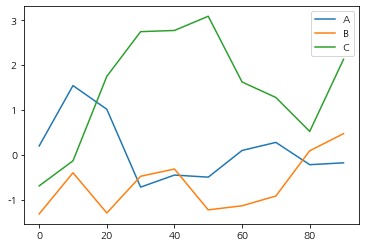

In [ ]:
# Numpy로 난수를 발생시키고 시각화하기
a = pd.DataFrame(np.random.randn(10,3).cumsum(axis=0),
                 columns = ['A','B','C'], index = np.arange(0,100,10))
a.plot()

In [ ]:
# random sampling
# 이항분포: np.random.binomial(n,p,size)
# 포아송분포: np.random.poisson(lam, size)
# 정규분포: np.random.normal(mu, sigma, size)
# t분포: np.random.standard_t(df, size)
# 균등분포: np.random,uniform(low, high, size)
# F-분포: np.random.f(dfnum, dfden, size)
# 카이제곱분포: np.random.chisquare(df,size)

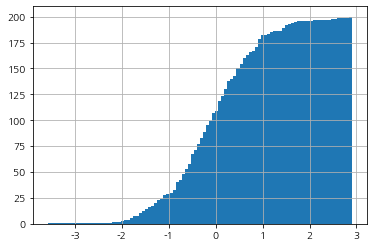

In [ ]:
# histogram
b = pd.Series(np.random.normal(0,1, size = 200))
b.hist(bins = 100, cumulative = True)

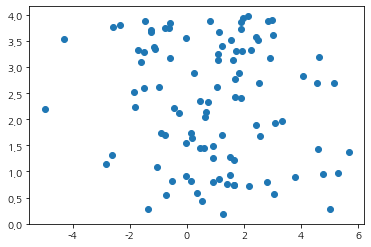

In [ ]:
# scatter
x = np.concatenate([np.random.normal(1,2, size = (100,1)), np.random.uniform(0,4, size = (100,1))], axis =1)
scat = pd.DataFrame(x, columns=['x1','x2'])
# scat.head()
plt.scatter(scat['x1'], scat['x2'])

In [ ]:
# US_Presidents.CSV

In [ ]:
import pandas as pd
Presidents = pd.read_csv('/content/drive/MyDrive/US_Presidents.CSV', index_col = 'Years')
Presidents

,President,Party
Years,,
1789,George Washington,None
1790,George Washington,None
1791,George Washington,None
1792,George Washington,None
1793,George Washington,None
...,...,...
2018,Donald Trump,Republican
2019,Donald Trump,Republican
2020,Donald Trump,Republican


In [ ]:
Presidents.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 236 entries, 1789 to 2022
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   President  236 non-null    object
 1   Party      236 non-null    object
dtypes: object(2)
memory usage: 5.5+ KB


In [ ]:
Presidents.describe()

,President,Party
count,236,236
unique,45,7
top,Franklin Roosevelt,Republican
freq,12,93


In [ ]:
# Party level별 빈도값 구하기
party = Presidents.Party.value_counts()
party

Republican               93
Democrat                 90
Democratic-Republican    28
Whig                      9
None                      8
Federalist                4
National Union            4
Name: Party, dtype: int64

Text(0, 0.5, 'Party')

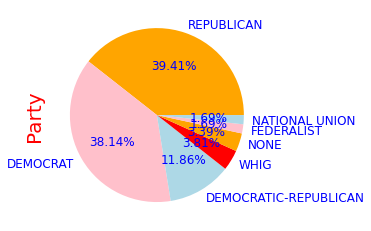

In [ ]:
#party.plot(kind='pie')
#party.plot.pie()
party.plot.pie(textprops={'fontsize':12, 'color':'blue'},
           colors= ['orange','pink','lightblue','red'],
           labels = [i.upper() for i in party.index], autopct = '%0.2f%%')
plt.ylabel(party.name, fontsize = 20, color = 'red')

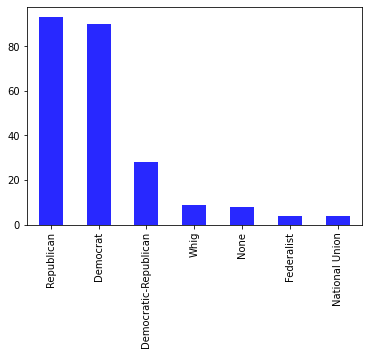

In [ ]:
party.plot(kind='bar', color = 'blue', alpha = 0.6)    # alpha: 투명도
party.plot.bar(color = 'blue', alpha = 0.6)

In [ ]:
# Series party의 값을 상대빈도로 변환
party.apply(lambda x: x/party.sum())
#party.apply(lambda x: x/party.sum()).plot.bar(color='blue', alpha = 0.5)

Republican               0.394068
Democrat                 0.381356
Democratic-Republican    0.118644
Whig                     0.038136
None                     0.033898
Federalist               0.016949
National Union           0.016949
Name: Party, dtype: float64

In [ ]:
party/party.sum()
#(party/party.sum()).plot.bar(color='blue', alpha = 0.5)

Republican               0.394068
Democrat                 0.381356
Democratic-Republican    0.118644
Whig                     0.038136
None                     0.033898
Federalist               0.016949
National Union           0.016949
Name: Party, dtype: float64

In [ ]:
# jupyter notebook에서 matplotlib 한글폰트 설정 (전역글꼴)
# 그래프를 노트북 안에 그리기 위해 설정
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

# 그래프에서 마이너스 폰트 깨지는 문제에 대한 대처
mpl.rcParams['axes.unicode_minus'] = False

font_list = fm.findSystemFonts(fontpaths = None, fontext = 'ttf')
font_list[:]
print('설정 파일 위치: ', mpl.matplotlib_fname())  #여기에서 font.family: 'NanumGothic' 으로 변경, axes.unicode = False 로 변경
# [(f.name, f.fname) for f in fm.fontManager.ttflist if 'Nanum' in f.name]

/usr/local/lib/python3.7/dist-packages/matplotlib/mpl-data/matplotlibrc


In [ ]:
# colab에서 matplotlib 한글폰트 설정1
!apt-get update -qq
!apt-get install fonts-nanum* -qq

Selecting previously unselected package fonts-nanum.
(Reading database ... 155335 files and directories currently installed.)
Preparing to unpack .../fonts-nanum_20170925-1_all.deb ...
Unpacking fonts-nanum (20170925-1) ...
Selecting previously unselected package fonts-nanum-eco.
Preparing to unpack .../fonts-nanum-eco_1.000-6_all.deb ...
Unpacking fonts-nanum-eco (1.000-6) ...
Selecting previously unselected package fonts-nanum-extra.
Preparing to unpack .../fonts-nanum-extra_20170925-1_all.deb ...
Unpacking fonts-nanum-extra (20170925-1) ...
Selecting previously unselected package fonts-nanum-coding.
Preparing to unpack .../fonts-nanum-coding_2.5-1_all.deb ...
Unpacking fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-extra (20170925-1) ...
Setting up fonts-nanum (20170925-1) ...
Setting up fonts-nanum-coding (2.5-1) ...
Setting up fonts-nanum-eco (1.000-6) ...
Processing triggers for fontconfig (2.12.6-0ubuntu2) ...


In [ ]:
# colab에서 matplotlib 한글폰트 설정2
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.font_manager as fm
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False

path = '/usr/share/fonts/truetype/nanum/NanumGothic.ttf'
font_name = mpl.font_manager.FontProperties(fname=path).get_name()
mpl.rc('font', family=font_name)
mpl.font_manager._rebuild()

# 런타임 다시 시작

In [ ]:
# PresidentsParty.CSV

In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/PresidentsParty.CSV', index_col = 0)

In [ ]:
print(df.shape)
df.info()
df.head(7)

(61, 2)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 61 entries, 1789 to 2021
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   President  61 non-null     object
 1   Party      61 non-null     object
dtypes: object(2)
memory usage: 1.4+ KB


,President,Party
Years,,
1789,George Washington,None
1793,George Washington,None
1797,John Adams,Federalist
1801,Thomas Jefferson,Democratic-Republican
1805,Thomas Jefferson,Democratic-Republican
1809,James Madison,Democratic-Republican
1813,James Madison,Democratic-Republican


In [ ]:
# 1. 동일 인명 대통령의 취임횟수(1회/2회/3회)를 산출하여 시각화
df['President'].value_counts()
df['President'].value_counts().value_counts()

1    26
2    16
3     1
Name: President, dtype: int64

([<matplotlib.axis.XTick at 0x7fbd29f07690>,
 [Text(0, 0, '1회'), Text(0, 0, '2회'), Text(0, 0, '3회')])

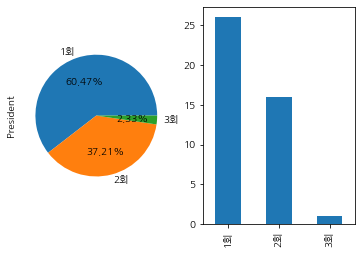

In [ ]:
a = df['President'].value_counts().value_counts()
plt.subplot(1,2,1)
a.plot.pie(labels = [str(i) + '회' for i in a.index],
          autopct = '%0.2f%%')
plt.subplot(1,2,2)
a.plot.bar()
plt.xticks(range(3), [str(i) + '회' for i in a.index])

In [ ]:
# 2. 최장 재임 대통령 구하기
print('최장 재임 미국 대통령:',)

최장 재임 미국 대통령: Franklin Roosevelt


In [ ]:
# 3, 2회 연임 대통령, 가족 성을 기준으로 오름차순하여 출력하기
a = df['President'].value_counts()
b = [' '.join(j) for j in sorted([i.split() for i in a[a==2].index],
                                key = lambda x : x[-1])] # split한 이유 가족성(x[-1])을 기준으로 오름차순하려고
print('2회 연임 미국 대통령:\n' + '\n'.join(b))

2회 연임 미국 대통령:
George W. Bush
Grover Cleveland
Bill Clinton
Dwight D. Eisenhower
Ulysses S. Grant
Andrew Jackson
Thomas Jefferson
James Madison
James Monroe
Richard M. Nixon
Barack Obama
Ronald Reagan
Theodore Roosevelt
Harry S. Truman
George Washington
Woodrow Wilson


In [ ]:
# 4. 2회 연임 대통령 데이터프레임으로 출력하기
# isin( , , ..): True or False로 출력
a = df['President'].value_counts()
df[df.President.isin(a[a==2].index)]

In [ ]:
# 5. 취임횟수 2회가 아닌 대통령 데이터프레임
# ~: not
df[~(df.President.isin(a[a==2].index))]

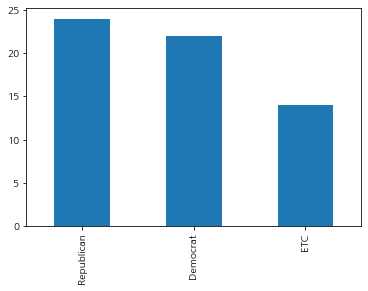

In [ ]:
# 6. 정당별 bar plot 만들기
df.Party.value_counts().plot.bar()

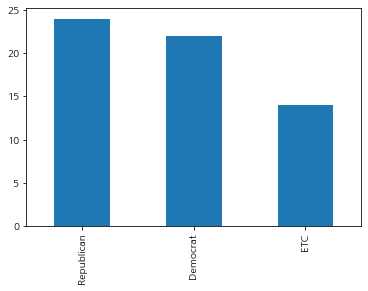

In [ ]:
# 7. Republican과 Democrat을 제외한 정당을 모두 ETC로 변환하여 bar plot으로 나타내기
df.Party[~df.Party.isin(['Republican', 'Democrat'])] = 'ETC'
# df
df.Party.value_counts().plot.bar()

In [ ]:
df.head()

,President,Party
Years,,
1789,George Washington,ETC
1793,George Washington,ETC
1797,John Adams,ETC
1801,Thomas Jefferson,ETC
1805,Thomas Jefferson,ETC


In [ ]:
# value_counts(): Series에만 적용
# groupby(): Series, DataFrame에 적용가능, column의 값들을 구분해서 연산, level별 연산 grouping
df.groupby('Party').size()
df.groupby(['Party','President']).size()   # Party: 상위기준, President: 하위기준

Party       President             
Democrat    Andrew Jackson            2
            Barack Obama              2
            Bill Clinton              2
            Franklin Pierce           1
            Franklin Roosevelt        3
            Grover Cleveland          2
            Harry S. Truman           2
            James Buchanan            1
            James K. Polk             1
            Jimmy Carter              1
            John F. Kennedy           1
            Lyndon B. Johnson         1
            Martin Van Buren          1
            Woodrow Wilson            2
ETC         Andrew Johnson            1
            George Washington         2
            James Madison             2
            James Monroe              2
            John Adams                1
            John Quincy Adams         1
            John Tyler                1
            Thomas Jefferson          2
            William Henry Harrison    1
            Zachary Taylor            1
Repub

([<matplotlib.axis.YTick at 0x7f43ef0d7c50>,
 <a list of 4 Text major ticklabel objects>)

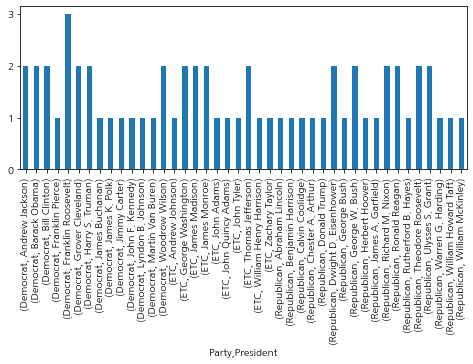

In [ ]:
df.groupby(['Party','President']).size().plot.bar(figsize=(8,3))
plt.yticks(range(4))

In [ ]:
# hierarchical indexing
a = df.groupby(['Party','President']).size()
a['Democrat']
a.Democrat

President
Andrew Jackson        2
Barack Obama          2
Bill Clinton          2
Franklin Pierce       1
Franklin Roosevelt    3
Grover Cleveland      2
Harry S. Truman       2
James Buchanan        1
James K. Polk         1
Jimmy Carter          1
John F. Kennedy       1
Lyndon B. Johnson     1
Martin Van Buren      1
Woodrow Wilson        2
dtype: int64

([<matplotlib.axis.YTick at 0x7f43eec94f90>,
 <a list of 4 Text major ticklabel objects>)

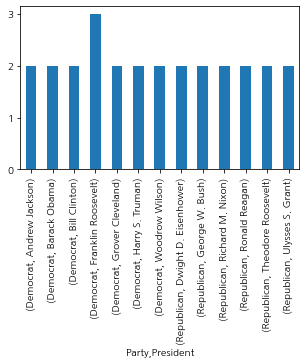

In [ ]:
# 8. 2회 이상 연임한 Democrat, Republican 정당의 대통령을 추출하여 시각화
a = df.groupby(['Party','President']).size()
a[a>1][['Democrat','Republican']]   # Fancy indexing, 상위기준(Party)
a[a>1][['Democrat','Republican']].plot.bar(figsize=(5,3))
plt.yticks(range(4))

In [ ]:
# 9. 상위 계층: Party, 하위 계층: 취임횟수인 Series
b = df.groupby(['Party', 'President']).size().groupby('Party').value_counts()
b

Party        
Democrat    1     7
            2     6
            3     1
ETC         1     6
            2     4
Republican  1    12
            2     6
dtype: int64

In [ ]:
# unstack: 이원분할 빈도 교차표
c = b.unstack().fillna(0).astype('int')
c

,1,2,3
Party,,,
Democrat,7,6,1
ETC,6,4,0
Republican,12,6,0


Text(0.5, 1.0, '정당별 역대 미국 대통령 동일 인물 취임 횟수')

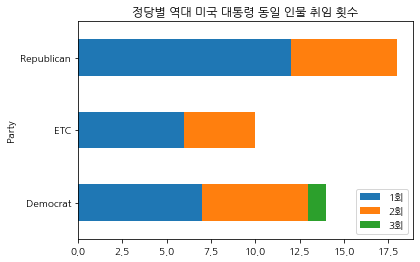

In [ ]:
c.columns = [str(i) + '회' for i in c.columns]
c.plot.barh(stacked = True)
plt.title('정당별 역대 미국 대통령 동일 인물 취임 횟수')

In [ ]:
# 카이제곱 검정 // 값이 많지 않으므로 해당 데이터셋에는 Fisher's exact test가 더 적절함

In [ ]:
from scipy.stats import chi2_contingency
chi2, p, df, expected = chi2_contingency(c)     # c: 이원분할빈도교차표(df)
print(f'Chi2: {chi2}\np-value: {p}\nDF: {df}')
print('Expected:\n', expected)      # expected(기대빈도) > 5인 값이 80%이상일 것

Chi2: 2.5680000000000005
p-value: 0.6325021189887472
DF: 4
Expected:
 [[ 8.33333333  5.33333333  0.33333333]
 [ 5.95238095  3.80952381  0.23809524]
 [10.71428571  6.85714286  0.42857143]]
